## Классификация

Импортирование и Инсталлирование Библиотек для работ с ними в дальнейшем

In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

Распокоука, Чтение и Ознакомление с Базой Данных

In [ ]:
!unzip wine+quality.zip

Archive:  wine+quality.zip
  inflating: winequality-red.csv     
  inflating: winequality-white.csv   
  inflating: winequality.names       


In [ ]:
df = pd.read_csv('winequality-red.csv', delimiter=';')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [36]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Разделяем Даннные на Иксы и Игрики, а затем на Тестовые и Тренировочные

In [44]:
X = df[df.columns[:-1]]
y = df['quality']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Создаем и Фитим Пайплайн с KNN

In [46]:
pipeline = Pipeline([
    ('preprocessing', StandardScaler()),
    ('model', KNeighborsClassifier(weights='distance'))
])

In [47]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('model', KNeighborsClassifier(weights='distance'))])

In [48]:
y_predicted = pipeline.predict(x_test)

In [49]:
accuracy_score(y_test, y_predicted)

0.64375

In [50]:
confusion_matrix(y_test, y_predicted)

array([[  0,   0,   2,   0,   0,   0],
       [  0,   0,   4,   3,   0,   0],
       [  0,   1, 103,  39,   1,   0],
       [  0,   1,  26,  81,  10,   1],
       [  0,   0,   2,  20,  22,   1],
       [  0,   0,   0,   3,   0,   0]])

# Модель CatBoost

Создаем Модельку и Фитим ее

In [51]:
cat_boost = CatBoostClassifier()
cat_boost.fit(x_train, y_train)

Learning rate set to 0.080126
0:	learn: 1.6926964	total: 72.2ms	remaining: 1m 12s
1:	learn: 1.6068698	total: 87.8ms	remaining: 43.8s
2:	learn: 1.5306049	total: 102ms	remaining: 33.8s
3:	learn: 1.4684960	total: 112ms	remaining: 27.9s
4:	learn: 1.4134686	total: 125ms	remaining: 24.8s
5:	learn: 1.3656362	total: 139ms	remaining: 23s
6:	learn: 1.3206292	total: 153ms	remaining: 21.8s
7:	learn: 1.2838273	total: 166ms	remaining: 20.6s
8:	learn: 1.2489712	total: 180ms	remaining: 19.8s
9:	learn: 1.2167925	total: 209ms	remaining: 20.7s
10:	learn: 1.1885212	total: 233ms	remaining: 20.9s
11:	learn: 1.1630822	total: 247ms	remaining: 20.4s
12:	learn: 1.1422035	total: 260ms	remaining: 19.7s
13:	learn: 1.1198449	total: 276ms	remaining: 19.4s
14:	learn: 1.0988103	total: 290ms	remaining: 19s
15:	learn: 1.0811278	total: 303ms	remaining: 18.7s
16:	learn: 1.0659796	total: 317ms	remaining: 18.3s
17:	learn: 1.0509840	total: 332ms	remaining: 18.1s
18:	learn: 1.0365370	total: 347ms	remaining: 17.9s
19:	learn: 1

Предугадываем Тестовые Данные и Вычисляем Точность

In [52]:
y_predicted = cat_boost.predict(x_test)

In [54]:
accuracy_score(y_test, y_predicted)

0.709375

In [55]:
confusion_matrix(y_test, y_predicted)

array([[  0,   1,   1,   0,   0,   0],
       [  0,   0,   5,   2,   0,   0],
       [  0,   0, 125,  18,   1,   0],
       [  0,   0,  29,  81,   9,   0],
       [  0,   0,   4,  19,  21,   1],
       [  0,   0,   0,   1,   2,   0]])

# Модель XGBBoost

Так как Индексы этой Модели Должны Начинаться с 0, то Нужно Отнять Необходимое Число, т.е. 3

In [56]:
xgb_y_train = y_train - 3
xgb_y_test = y_test - 3

Создаем Модельку и Фитим ее

In [57]:
xgb = XGBClassifier()
xgb.fit(x_train, xgb_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Предугадываем Тестовые Данные и Вычисляем Точность

In [58]:
y_predicted = xgb.predict(x_test)

In [59]:
accuracy_score(xgb_y_test, y_predicted)

0.721875

In [60]:
confusion_matrix(xgb_y_test, y_predicted)

array([[  0,   0,   2,   0,   0,   0],
       [  0,   1,   4,   2,   0,   0],
       [  0,   0, 120,  23,   1,   0],
       [  0,   0,  21,  87,  11,   0],
       [  0,   0,   3,  18,  23,   1],
       [  0,   0,   0,   1,   2,   0]])

# Модель LGBMBoost

Создаем Модельку и Фитим ее

In [61]:
lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 1279, number of used features: 11
[LightGBM] [Info] Start training from score -5.074392
[LightGBM] [Info] Start training from score -3.325192
[LightGBM] [Info] Start training from score -0.867836
[LightGBM] [Info] Start training from score -0.901930
[LightGBM] [Info] Start training from score -2.116881
[LightGBM] [Info] Start training from score -4.445784
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

LGBMClassifier()

Предугадываем Тестовые Данные и Вычисляем Точность

In [62]:
y_predicted = lgbm.predict(x_test)

In [63]:
accuracy_score(y_test, y_predicted)

0.725

In [64]:
confusion_matrix(y_test, y_predicted)

array([[  0,   1,   1,   0,   0,   0],
       [  0,   0,   5,   2,   0,   0],
       [  0,   0, 122,  21,   1,   0],
       [  0,   0,  21,  88,  10,   0],
       [  0,   0,   4,  18,  22,   1],
       [  0,   0,   0,   1,   2,   0]])

# Ensemble с StackingClassifier

Создаем Пайплайн

In [65]:
pipeline = Pipeline([
    ('prep', StandardScaler()),
    ('model', KNeighborsClassifier())
])
ensemble = [
    ('KNN', pipeline),
    ('XGBoost', XGBClassifier()),
    ('CatBoost', CatBoostClassifier()),
    ('LGBM', LGBMClassifier())
]
model = StackingClassifier(ensemble)

Фитим Модельку

In [66]:
model.fit(x_train, xgb_y_train)

Выходные данные были обрезаны до нескольких последних строк (5000).
350:	learn: 0.3281977	total: 2.36s	remaining: 4.36s
351:	learn: 0.3273706	total: 2.36s	remaining: 4.35s
352:	learn: 0.3265447	total: 2.37s	remaining: 4.34s
353:	learn: 0.3255378	total: 2.38s	remaining: 4.34s
354:	learn: 0.3249423	total: 2.38s	remaining: 4.33s
355:	learn: 0.3241730	total: 2.39s	remaining: 4.32s
356:	learn: 0.3237920	total: 2.4s	remaining: 4.32s
357:	learn: 0.3227308	total: 2.4s	remaining: 4.31s
358:	learn: 0.3215380	total: 2.41s	remaining: 4.3s
359:	learn: 0.3211266	total: 2.42s	remaining: 4.3s
360:	learn: 0.3206407	total: 2.42s	remaining: 4.29s
361:	learn: 0.3196345	total: 2.43s	remaining: 4.28s
362:	learn: 0.3191046	total: 2.44s	remaining: 4.27s
363:	learn: 0.3186197	total: 2.44s	remaining: 4.27s
364:	learn: 0.3179148	total: 2.45s	remaining: 4.26s
365:	learn: 0.3175888	total: 2.45s	remaining: 4.25s
366:	learn: 0.3165401	total: 2.46s	remaining: 4.25s
367:	learn: 0.3159698	total: 2.47s	remaining: 4.24s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(estimators=[('KNN',
                                Pipeline(steps=[('prep', StandardScaler()),
                                                ('model',
                                                 KNeighborsClassifier())])),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=Non...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('CatBoost',
                                <catboost.core.CatBoostClassifier object at 0x7c1ca2c721d0>),
                               ('LGBM', LGBMClassifier())])

Предугадываем Тестовые Данные и Вычисляем Точность

In [67]:
y_predicted = model.predict(x_test)

In [68]:
accuracy_score(xgb_y_test, y_predicted)

0.725

In [69]:
confusion_matrix(xgb_y_test, y_predicted)

array([[  0,   0,   2,   0,   0,   0],
       [  0,   0,   5,   2,   0,   0],
       [  0,   0, 124,  19,   1,   0],
       [  0,   0,  24,  88,   7,   0],
       [  0,   0,   3,  21,  20,   1],
       [  0,   0,   0,   2,   1,   0]])

# Ensemble с VotingClassifier

Вычилем среди Бустеров Чей Голос Весомее

In [70]:
accuracies = np.array([0.64375, 0.709375, 0.721875, 0.725])
sum_acc = np.sum(accuracies)
weights = accuracies / sum_acc
weights

array([0.22991071, 0.25334821, 0.2578125 , 0.25892857])

In [71]:
class CatBoostUpdated(CatBoostClassifier):

  def predict(self, *args, **kwargs):
    result = super().predict(*args, **kwargs)
    return result.reshape((-1,))

Создаем Пайплайн

In [72]:
pipeline = Pipeline([
    ('prep', StandardScaler()),
    ('model', KNeighborsClassifier())
])
ensemble = [
    ('KNN', pipeline),
    ('CatBoost', CatBoostUpdated()),
    ('XGBoost', XGBClassifier()),
    ('LGBM', LGBMClassifier())
]
model = VotingClassifier(ensemble, weights=weights)

Фитим Модельку

In [73]:
model.fit(x_train, xgb_y_train)

Learning rate set to 0.080126
0:	learn: 1.6926964	total: 10.8ms	remaining: 10.8s
1:	learn: 1.6068698	total: 23ms	remaining: 11.5s
2:	learn: 1.5306049	total: 35.3ms	remaining: 11.7s
3:	learn: 1.4684960	total: 48.1ms	remaining: 12s
4:	learn: 1.4134686	total: 58.7ms	remaining: 11.7s
5:	learn: 1.3656362	total: 74.6ms	remaining: 12.4s
6:	learn: 1.3206292	total: 85.6ms	remaining: 12.1s
7:	learn: 1.2838273	total: 97.6ms	remaining: 12.1s
8:	learn: 1.2489712	total: 117ms	remaining: 12.8s
9:	learn: 1.2167925	total: 127ms	remaining: 12.6s
10:	learn: 1.1885212	total: 140ms	remaining: 12.6s
11:	learn: 1.1630822	total: 152ms	remaining: 12.5s
12:	learn: 1.1422035	total: 165ms	remaining: 12.5s
13:	learn: 1.1198449	total: 177ms	remaining: 12.5s
14:	learn: 1.0988103	total: 191ms	remaining: 12.6s
15:	learn: 1.0811278	total: 230ms	remaining: 14.1s
16:	learn: 1.0659796	total: 254ms	remaining: 14.7s
17:	learn: 1.0509840	total: 275ms	remaining: 15s
18:	learn: 1.0365370	total: 290ms	remaining: 15s
19:	learn: 

VotingClassifier(estimators=[('KNN',
                              Pipeline(steps=[('prep', StandardScaler()),
                                              ('model',
                                               KNeighborsClassifier())])),
                             ('CatBoost',
                              <__main__.CatBoostUpdated object at 0x7c1ca2cf54b0>),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('LGBM', LGBMClassifier())],
                 weights=array([0.22991071, 0.25334821, 0.2578125 , 0.25892857]))

Предугадываем Тестовые Данные и Вычисляем Точность

In [74]:
y_predicted = model.predict(x_test)

In [75]:
accuracy_score(xgb_y_test, y_predicted)

0.721875

In [76]:
confusion_matrix(xgb_y_test, y_predicted)

array([[  0,   1,   1,   0,   0,   0],
       [  0,   0,   5,   2,   0,   0],
       [  0,   0, 124,  19,   1,   0],
       [  0,   0,  24,  85,  10,   0],
       [  0,   0,   3,  19,  22,   1],
       [  0,   0,   0,   1,   2,   0]])

# Регрессия

Импортирование и Инсталлирование Библиотек для работ с ними в дальнейшем

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor, VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

Распокоука, Чтение и Ознакомление с Базой Данных

In [109]:
!unzip house-prices-advanced-regression-techniques -d house-prices-advanced-regression-techniques

Archive:  house-prices-advanced-regression-techniques.zip
replace house-prices-advanced-regression-techniques/data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: house-prices-advanced-regression-techniques/data_description.txt  
  inflating: house-prices-advanced-regression-techniques/sample_submission.csv  
  inflating: house-prices-advanced-regression-techniques/test.csv  
  inflating: house-prices-advanced-regression-techniques/train.csv  


In [110]:
df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv', index_col='Id')

In [111]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [112]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

Создаем Переменную с Помощи Коррелиации, и Создаем Таблицу по Коррелиации

In [114]:
corr = df.corr(numeric_only=True)

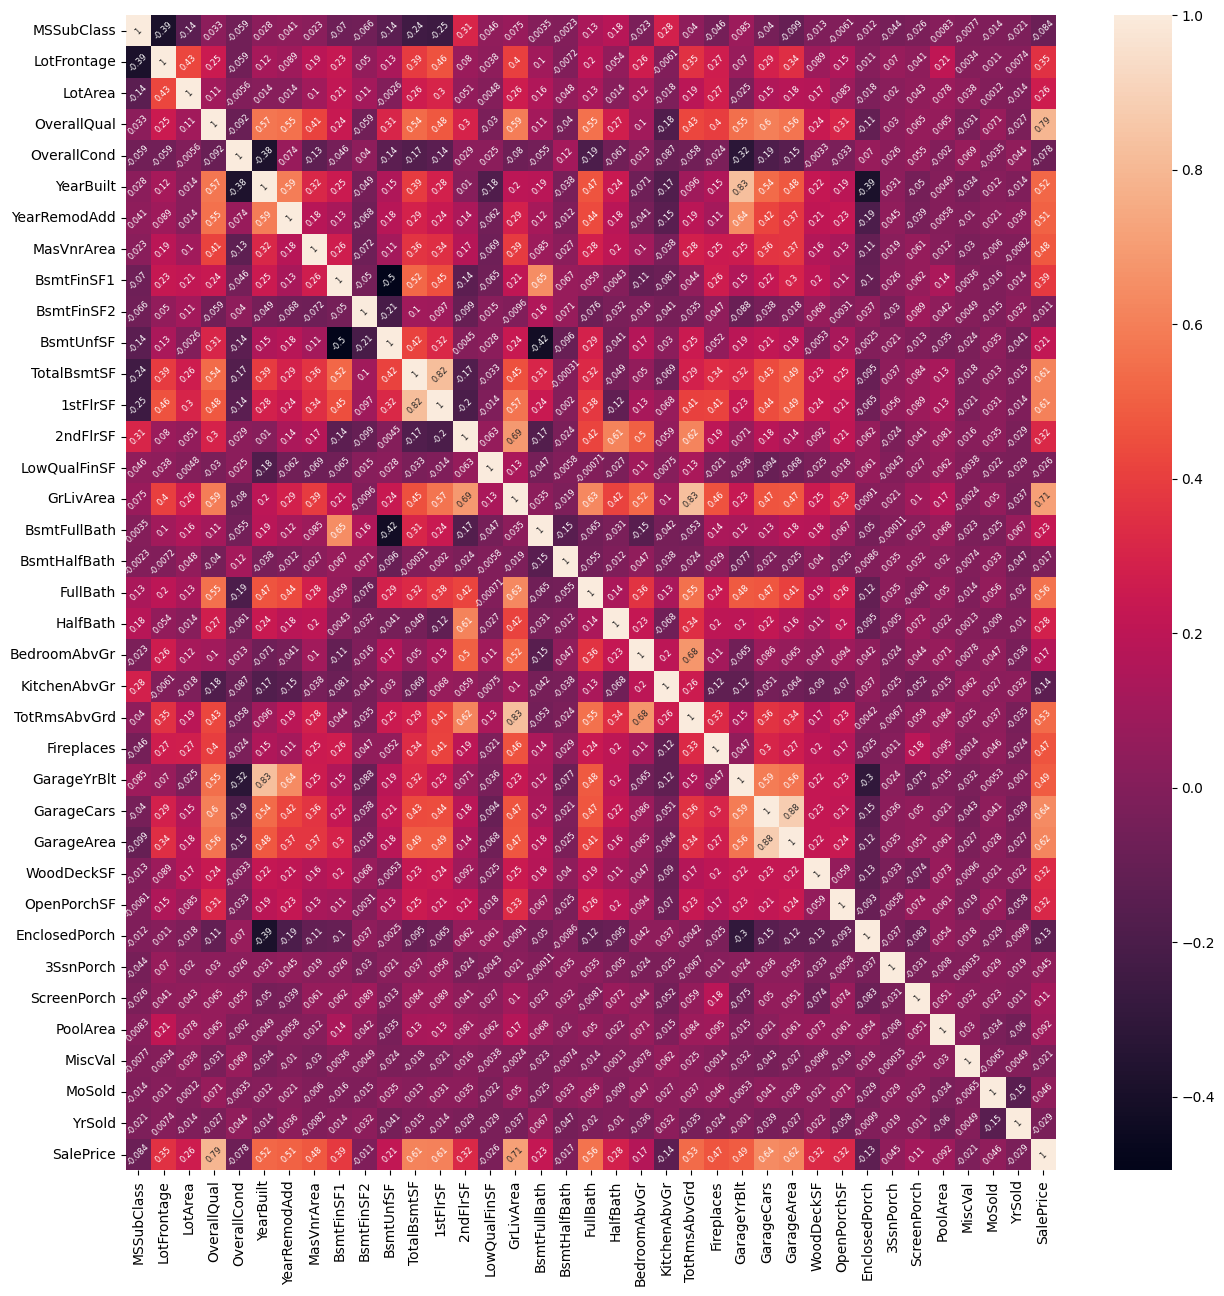

In [115]:
plt.figure(figsize=(15, 15))
sns.heatmap(
    corr,
    annot=True,
    annot_kws={
        'size': 6,
        'rotation': 45
    }
)
plt.show()

In [116]:
to_remove = []

for i in corr.columns:
  for j in corr.columns:
    if i == j:
      continue
    if (
        not i in to_remove
        and not j in to_remove
        and (corr.loc[i, j] >= 0.75
             or corr.loc[i, j] <= -0.75
            )
        ):
        to_remove.append(j)

to_remove = to_remove[1:]
df.drop(columns=to_remove, inplace=True)

In [117]:
to_remove

['GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']

Создаем Пайплайн для стандартизации и кодировки категориальных данных в числовые с помощью модельки KNN

In [127]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler(with_mean=False))
])
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])
transformer = ColumnTransformer([
    ('numeric_transformer', num_pipeline, df.select_dtypes(include=np.number).columns[:-1]),
    ('categoric_transformer', cat_pipeline, df.select_dtypes(include='object').columns)
])

In [128]:
pipeline = Pipeline([
    ('preprocessing', transformer),
    ('model', KNeighborsRegressor()),
])

In [129]:
X = df[df.columns[:-1]]
y = df['SalePrice']

In [130]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Фитим Пайплайн

In [131]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('model', KNeighborsRegressor())])

Предугадываем Тестовые Данные и Вычисляем Точность

In [132]:
y_predicted = pipeline.predict(x_test)

In [133]:
mean_squared_error(y_test, y_predicted)

1562448296.2428768

In [134]:
mean_squared_log_error(y_test, y_predicted)

0.0362963361272122

# Модель XGBBoost

Создаем Пайплайн с помощью модельки KNN

In [135]:
pipeline = Pipeline([
    ('preprocessing', transformer),
    ('model', XGBRegressor()),
])

Фитим Пайплайн

In [136]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

Предугадываем Тестовые Данные и Вычисляем Точность

In [137]:
y_predicted = pipeline.predict(x_test)

In [138]:
mean_squared_error(y_test, y_predicted)

771314844.3773443

In [139]:
mean_squared_log_error(y_test, y_predicted)

0.019951162984704302

# Модель LGBMBoost

In [140]:
pipeline = Pipeline([
    ('preprocessing', transformer),
    ('model', LGBMRegressor()),
])

Фитим Пайплайн

In [141]:
pipeline.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2590
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 174
[LightGBM] [Info] Start training from score 182330.841610


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('model', LGBMRegressor())])

Предугадываем Тестовые Данные и Вычисляем Точность

In [142]:
y_predicted = pipeline.predict(x_test)

In [145]:
mean_squared_error(y_test, y_predicted)

831143725.9096497

In [146]:
mean_squared_log_error(y_test, y_predicted)

0.019784859873841276